In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [7]:
df = pd.read_csv("city combine.csv")
df.head()


,Unnamed: 0,review_id,u_id,business_id,rev_stars,date,bus_id,name,city,state,...,is_open,attributes,categories,hours,user_id,name.1,UserReview_count,yelping_since,friends,average_stars
0,0,Rc--KMb2vv0z5zUyEwLS3A,0LUt7xSvYgLpL0zBezI5QA,nvbfWYxTNq5XgJkcAPcXNQ,5.0,2015-10-24 14:04:14,nvbfWYxTNq5XgJkcAPcXNQ,Thai One On,North York,ON,...,0,"Row(AcceptsInsurance=None, AgesAllowed=None, A...","Restaurants, Thai","Row(Friday='10:0-22:0', Monday='10:0-22:0', Sa...",0LUt7xSvYgLpL0zBezI5QA,Jovel,17,2015-05-17 22:45:50,"vRIy03B-RojFB-pwpWECVw, VUPQF1XuNBv1gfCv7lyv7Q...",4.00
1,1,ukVjELEdLdtI7bDnkhTCWQ,0LUt7xSvYgLpL0zBezI5QA,snw9iNNLpFYZeHotW00uVA,5.0,2015-10-24 12:29:24,snw9iNNLpFYZeHotW00uVA,Lee Restaurant,Toronto,ON,...,1,"Row(AcceptsInsurance=None, AgesAllowed=None, A...","Restaurants, Asian Fusion","Row(Friday='17:0-23:30', Monday='0:0-0:0', Sat...",0LUt7xSvYgLpL0zBezI5QA,Jovel,17,2015-05-17 22:45:50,"vRIy03B-RojFB-pwpWECVw, VUPQF1XuNBv1gfCv7lyv7Q...",4.00
2,2,cMN9eDHkH7SCsYsW14ubew,31nz8urmYS2uogLPWZnx7Q,41o1FUbCYKJv2djtnlkzlg,4.0,2016-10-28 00:40:36,41o1FUbCYKJv2djtnlkzlg,Bar Raval,Toronto,ON,...,1,"Row(AcceptsInsurance=None, AgesAllowed=None, A...","Restaurants, Nightlife, Spanish, Bars, Tapas B...","Row(Friday='11:0-2:0', Monday='11:0-2:0', Satu...",31nz8urmYS2uogLPWZnx7Q,Nhi,112,2013-09-27 00:29:03,"jq4k1GUc4DV_te_i1pOzQA, r6_B9482C89MQhKvthrtAA...",3.88
3,3,Sa34RHfNOKpz-vf1OuOBnQ,47NAV-86kgFEuIWT3Y9o-A,EK38MXW_OsC5CZVvIZodIw,4.0,2016-08-22 01:15:05,EK38MXW_OsC5CZVvIZodIw,Fugo Desserts,Toronto,ON,...,1,"Row(AcceptsInsurance=None, AgesAllowed=None, A...","Restaurants, Waffles, Food, Ice Cream & Frozen...","Row(Friday='12:0-22:0', Monday='12:0-21:0', Sa...",47NAV-86kgFEuIWT3Y9o-A,Serina,1,2016-08-22 01:05:41,"NZ2trqLpx_E01DGlNzk6Bw, 6RUSbHGH0RlNVnrNmXuTbg...",4.00
4,4,nLIa4T0mbuqlztKHtZVRHg,6J0mGxAaPuHAPj8ShjOCag,OIdOJaNS8M624F58XGV3PQ,3.0,2016-04-23 01:18:12,OIdOJaNS8M624F58XGV3PQ,Pizzeria Libretto Danforth,Toronto,ON,...,1,"Row(AcceptsInsurance=None, AgesAllowed=None, A...","Restaurants, Italian, Pizza","Row(Friday='11:30-23:0', Monday='11:30-22:0', ...",6J0mGxAaPuHAPj8ShjOCag,Melissa,58,2011-04-02 01:22:38,"FRe2ylKTM2DajzvaUp0nQg, PP_DKB0H31-Rx3R6aqthUQ...",3.17


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45047 entries, 0 to 45046
Data columns (total 22 columns):
Unnamed: 0          45047 non-null int64
review_id           45047 non-null object
u_id                45047 non-null object
business_id         45047 non-null object
rev_stars           45047 non-null float64
date                45047 non-null object
bus_id              45047 non-null object
name                45047 non-null object
city                45047 non-null object
state               45047 non-null object
bus_stars           45047 non-null float64
ResReview_count     45047 non-null int64
is_open             45047 non-null int64
attributes          44795 non-null object
categories          45047 non-null object
hours               40411 non-null object
user_id             45047 non-null object
name.1              45047 non-null object
UserReview_count    45047 non-null int64
yelping_since       45047 non-null object
friends             45047 non-null object
average_sta

In [9]:
df.describe()

,Unnamed: 0,rev_stars,bus_stars,ResReview_count,is_open,UserReview_count,average_stars
count,45047.000000,45047.000000,45047.000000,45047.000000,45047.000000,45047.000000,45047.000000
mean,22523.000000,3.575133,3.551080,144.929829,0.802162,228.025573,3.615550
std,13004.093125,1.160914,0.543729,145.887460,0.398374,600.038936,0.473218
min,0.000000,1.000000,1.000000,3.000000,0.000000,1.000000,1.000000
25%,11261.500000,3.000000,3.000000,43.000000,1.000000,33.000000,3.390000
50%,22523.000000,4.000000,3.500000,95.000000,1.000000,89.000000,3.640000
75%,33784.500000,4.000000,4.000000,191.000000,1.000000,212.000000,3.880000
max,45046.000000,5.000000,5.000000,700.000000,1.000000,7750.000000,5.000000


In [10]:

df = df[(df.state == 'ON' )|(df.state == 'BC' ) ]
df.info()
df_categories1 = df['categories'].str.split(',', expand=True)
df_categories = pd.get_dummies(df_categories1)
df_categories1.info()
df_categories.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45047 entries, 0 to 45046
Data columns (total 22 columns):
Unnamed: 0          45047 non-null int64
review_id           45047 non-null object
u_id                45047 non-null object
business_id         45047 non-null object
rev_stars           45047 non-null float64
date                45047 non-null object
bus_id              45047 non-null object
name                45047 non-null object
city                45047 non-null object
state               45047 non-null object
bus_stars           45047 non-null float64
ResReview_count     45047 non-null int64
is_open             45047 non-null int64
attributes          44795 non-null object
categories          45047 non-null object
hours               40411 non-null object
user_id             45047 non-null object
name.1              45047 non-null object
UserReview_count    45047 non-null int64
yelping_since       45047 non-null object
friends             45047 non-null object
average_sta

In [11]:
df_categories.head()

,0_Restaurants,1_ Afghan,1_ African,1_ American (New),1_ American (Traditional),1_ Arabian,1_ Arts & Entertainment,1_ Asian Fusion,1_ Bagels,1_ Bakeries,...,10_ Desserts,10_ Sports Bars,10_ Wine & Spirits,11_ Argentine,11_ Bakeries,11_ Cafes,11_ Cocktail Bars,12_ Shopping,12_ Venues & Event Spaces,13_ Food
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df_final  = pd.concat([df, df_categories], axis=1, sort=False)

In [13]:
df_final.columns = df_final.columns.str.replace('0_','')
df_final.columns = df_final.columns.str.replace('1_ ','')
df_final.columns = df_final.columns.str.replace('2_ ','')
df_final.columns = df_final.columns.str.replace('3_ ','')
df_final.columns = df_final.columns.str.replace('4_ ','')
df_final.columns = df_final.columns.str.replace('5_ ','')
df_final.columns = df_final.columns.str.replace('6_ ','')
df_final.columns = df_final.columns.str.replace('7_ ','')
df_final.columns = df_final.columns.str.replace('8_ ','')
df_final.columns = df_final.columns.str.replace('9_ ','')
df_final.columns = df_final.columns.str.replace('10_ ','')
df_final.columns = df_final.columns.str.replace('11_ ','')
df_final.columns = df_final.columns.str.replace('12_ ','')
df_final.columns = df_final.columns.str.replace('13_ ','')
df_final.columns = df_final.columns.str.replace('1','')
df_final.columns = df_final.columns.str.replace('Unnamed: 0','Review_ID')
df_final = df_final.drop(columns = {'review_id','bus_id'})


In [14]:
labels, uniques =pd.factorize(df_final.business_id)
df_final['newbus_id'] = labels 

## Extract dataframe for business 

In [15]:
df_final.head()

,Review_ID,u_id,business_id,rev_stars,date,name,city,state,bus_stars,ResReview_count,...,Sports Bars,Wine & Spirits,Argentine,Bakeries,Cafes,Cocktail Bars,Shopping,Venues & Event Spaces,Food,newbus_id
0,0,0LUt7xSvYgLpL0zBezI5QA,nvbfWYxTNq5XgJkcAPcXNQ,5.0,2015-10-24 14:04:14,Thai One On,North York,ON,2.5,38,...,0,0,0,0,0,0,0,0,0,0
1,1,0LUt7xSvYgLpL0zBezI5QA,snw9iNNLpFYZeHotW00uVA,5.0,2015-10-24 12:29:24,Lee Restaurant,Toronto,ON,4.0,561,...,0,0,0,0,0,0,0,0,0,1
2,2,31nz8urmYS2uogLPWZnx7Q,41o1FUbCYKJv2djtnlkzlg,4.0,2016-10-28 00:40:36,Bar Raval,Toronto,ON,4.0,225,...,0,0,0,0,0,0,0,0,0,2
3,3,47NAV-86kgFEuIWT3Y9o-A,EK38MXW_OsC5CZVvIZodIw,4.0,2016-08-22 01:15:05,Fugo Desserts,Toronto,ON,3.5,232,...,0,0,0,0,0,0,0,0,0,3
4,4,6J0mGxAaPuHAPj8ShjOCag,OIdOJaNS8M624F58XGV3PQ,3.0,2016-04-23 01:18:12,Pizzeria Libretto Danforth,Toronto,ON,4.0,287,...,0,0,0,0,0,0,0,0,0,4


In [16]:
dfBusiness_raw = df_final[:]
dfBusiness_raw = dfBusiness_raw.drop(columns = {'Review_ID','review_id','u_id','rev_stars','date','ResReview_count','user_id','name1','UserReview_count','yelping_since','friends','average_stars'})


In [17]:
dfBusiness_raw = dfBusiness_raw.drop_duplicates(subset='business_id', keep='first', inplace=False)
BusinessIds = dfBusiness_raw.newbus_id
BusinessNames = dfBusiness_raw.name
dfBusiness_raw.index = BusinessIds 
dfBusiness_raw = dfBusiness_raw.drop(columns = {'newbus_id'})


In [18]:
dfBusiness_raw.head()

,business_id,name,city,state,bus_stars,is_open,attributes,categories,hours,name.,...,Desserts,Sports Bars,Wine & Spirits,Argentine,Bakeries,Cafes,Cocktail Bars,Shopping,Venues & Event Spaces,Food
newbus_id,,,,,,,,,,,,,,,,,,,,,
0,nvbfWYxTNq5XgJkcAPcXNQ,Thai One On,North York,ON,2.5,0,"Row(AcceptsInsurance=None, AgesAllowed=None, A...","Restaurants, Thai","Row(Friday='10:0-22:0', Monday='10:0-22:0', Sa...",Jovel,...,0,0,0,0,0,0,0,0,0,0
1,snw9iNNLpFYZeHotW00uVA,Lee Restaurant,Toronto,ON,4.0,1,"Row(AcceptsInsurance=None, AgesAllowed=None, A...","Restaurants, Asian Fusion","Row(Friday='17:0-23:30', Monday='0:0-0:0', Sat...",Jovel,...,0,0,0,0,0,0,0,0,0,0
2,41o1FUbCYKJv2djtnlkzlg,Bar Raval,Toronto,ON,4.0,1,"Row(AcceptsInsurance=None, AgesAllowed=None, A...","Restaurants, Nightlife, Spanish, Bars, Tapas B...","Row(Friday='11:0-2:0', Monday='11:0-2:0', Satu...",Nhi,...,0,0,0,0,0,0,0,0,0,0
3,EK38MXW_OsC5CZVvIZodIw,Fugo Desserts,Toronto,ON,3.5,1,"Row(AcceptsInsurance=None, AgesAllowed=None, A...","Restaurants, Waffles, Food, Ice Cream & Frozen...","Row(Friday='12:0-22:0', Monday='12:0-21:0', Sa...",Serina,...,0,0,0,0,0,0,0,0,0,0
4,OIdOJaNS8M624F58XGV3PQ,Pizzeria Libretto Danforth,Toronto,ON,4.0,1,"Row(AcceptsInsurance=None, AgesAllowed=None, A...","Restaurants, Italian, Pizza","Row(Friday='11:30-23:0', Monday='11:30-22:0', ...",Melissa,...,0,0,0,0,0,0,0,0,0,0


In [19]:
business_cluster = dfBusiness_raw.columns[11:]
business_cluster

Index(['Afghan', 'African', 'American (New)', 'American (Traditional)',
       'Arabian', 'Arts & Entertainment', 'Asian Fusion', 'Bagels', 'Bakeries',
       'Bangladeshi',
       ...
       ' Desserts', ' Sports Bars', ' Wine & Spirits', 'Argentine', 'Bakeries',
       'Cafes', 'Cocktail Bars', 'Shopping', 'Venues & Event Spaces', 'Food'],
      dtype='object', length=619)

In [20]:
dfBusiness = dfBusiness_raw[business_cluster]
dfBusiness = dfBusiness.loc[:,~dfBusiness.columns.duplicated()]

In [21]:
dfBusiness.head()




,Afghan,African,American (New),American (Traditional),Arabian,Arts & Entertainment,Asian Fusion,Bagels,Bakeries,Bangladeshi,...,Music & Video,Poke,Tabletop Games,Wineries,Breakfast & Brunch,Cafes,Canadian (New),Desserts,Sports Bars,Wine & Spirits
newbus_id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Exploring the data 

## Content Filter Clustering 

In [22]:
print(dfBusiness_raw.groupby('categories').categories.count())

categories
Restaurants                                                                                                              13
Restaurants, Afghan                                                                                                       6
Restaurants, Afghan, Butcher, Bakeries, Food                                                                              1
Restaurants, Afghan, Halal                                                                                                1
Restaurants, African                                                                                                      3
Restaurants, African, Moroccan                                                                                            1
Restaurants, American (New), Asian Fusion, Canadian (New)                                                                 1
Restaurants, American (New), Bars, Nightlife, Canadian (New)                                                             

## Part 1: Agglomoerative Clustering 

In [23]:
from scipy.cluster.hierarchy import linkage

completeEuclidZ = linkage(dfBusiness,method='complete',metric = 'euclidean')

print('The first row looks like {}'.format(completeEuclidZ[0]))
print('The last row looks like {}'.format(completeEuclidZ[-1]))

The first row looks like [ 0. 65.  0.  2.]
The last row looks like [1.19400000e+03 3.59300000e+03 3.16227766e+00 1.79800000e+03]


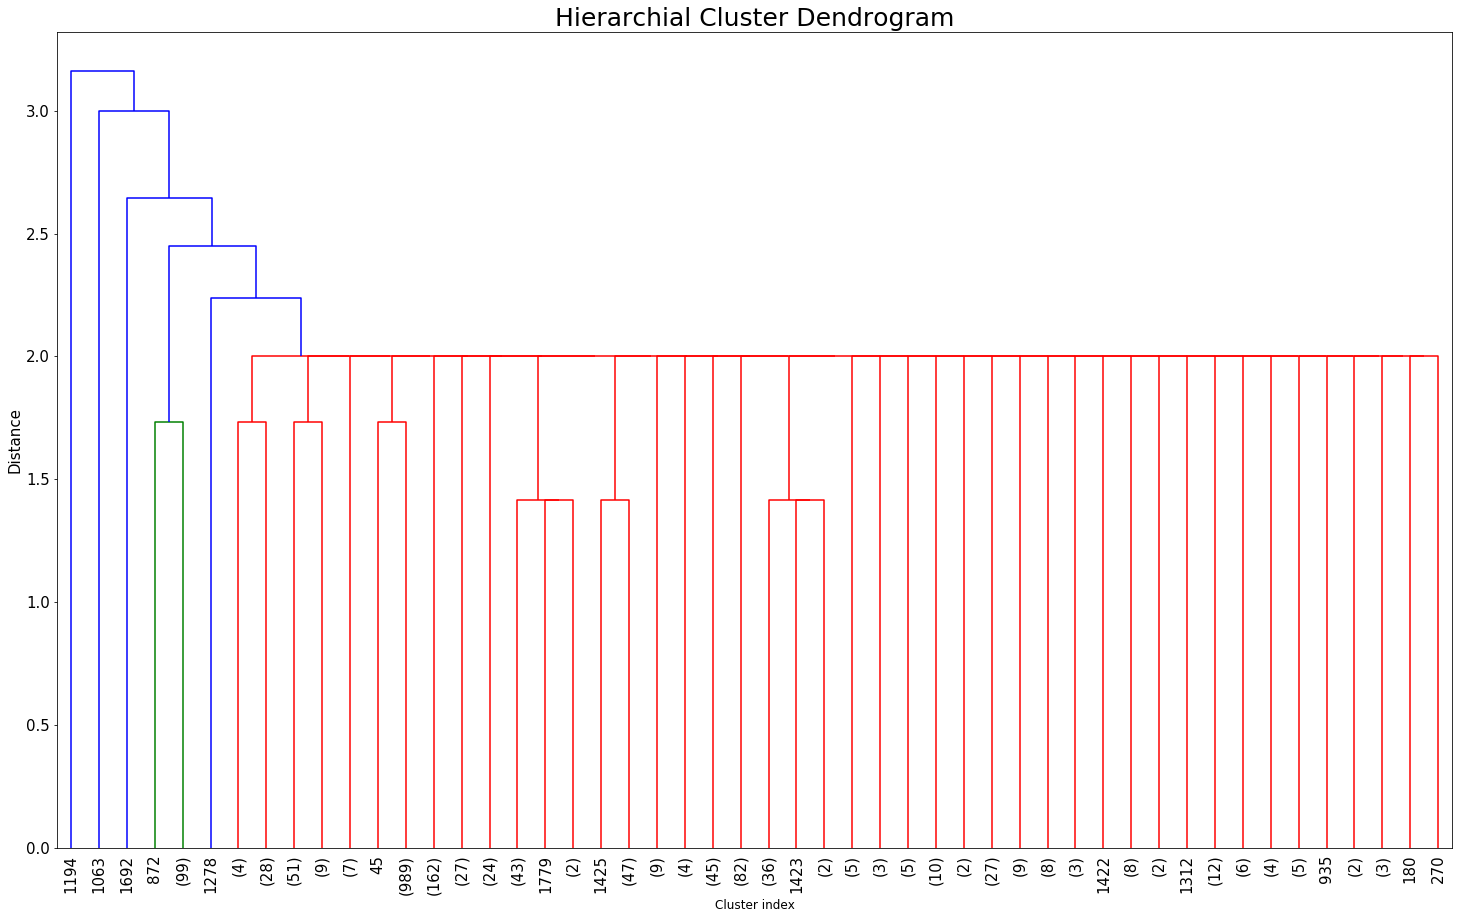

In [24]:
from scipy.cluster.hierarchy import dendrogram

# Initialize figure settings and labels
plt.figure(figsize=(25, 15))
plt.title('Hierarchial Cluster Dendrogram',fontsize = 25)
plt.xlabel('Cluster index',fontsize = 12)
plt.ylabel('Distance',fontsize = 15)
plt.yticks(fontsize = 15)

# Plot dendrogram with following parameters
# p = 75 and trucate_mode = 'lastp' work together to display
# only the final 75 nodes of the dendrogram
dendrogram(completeEuclidZ, 
            truncate_mode= 'lastp', # displays the final p linked clusters (i.e., nodes in graph)
            p = 50, # Number of clusters
            leaf_rotation=90, # Rotates cluster numbers on x-axis 
            leaf_font_size=15,
            show_leaf_counts = True) # Shows number of samples contained in each cluster

plt.show()

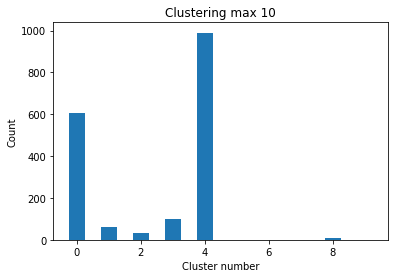

In [25]:
# Import the new clustering funciton
from sklearn.cluster import AgglomerativeClustering

# define the clustering model
hClusMdl = AgglomerativeClustering(n_clusters=10, linkage='complete', affinity = 'euclidean')
hClusMdl.fit(dfBusiness)

# Get cluster lables
clA = hClusMdl.labels_

# Make a histogram of number of points in each cluster (labeled 0 -> 9)
binNums = list(set(clA))
# Add on range to cover last value
binNums.append(np.max(binNums)+1)

#Plot histogram
plt.hist(clA,bins=binNums,rwidth=0.5,align='left')
plt.title('Clustering max 10')
plt.ylabel('Count')
plt.xlabel('Cluster number')

plt.show()

## Part 2 K-means clustering 

In [26]:
from sklearn.cluster import KMeans

# Define model and fit the model, which is similar format to previous regression models
mdlKMeans = KMeans(n_init = 1, # number of different centroid seed initializations (number of times algorithm is run)
                n_clusters=10, # number of clusters (k)
                random_state = 5) # random seed for kmean algorithm

mdlKMeans.fit(dfBusiness)

# Get cluster assignments for each datapoint
clK = mdlKMeans.labels_

# Get the centroid of each cluster
Centroids = mdlKMeans.cluster_centers_

In [27]:
Centroids

array([[-1.30104261e-17,  3.47826087e-03,  1.39130435e-02, ...,
         8.69565217e-04,  8.69565217e-04, -1.62630326e-18],
       [ 9.54097912e-18,  4.77048956e-18,  1.90819582e-17, ...,
         1.19262239e-18,  1.19262239e-18,  1.19262239e-18],
       [ 4.33680869e-18,  2.16840434e-18,  8.67361738e-18, ...,
         5.42101086e-19,  5.42101086e-19,  5.42101086e-19],
       ...,
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.73472348e-18,  8.67361738e-19,  3.46944695e-18, ...,
         2.16840434e-19,  2.16840434e-19,  2.16840434e-19],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

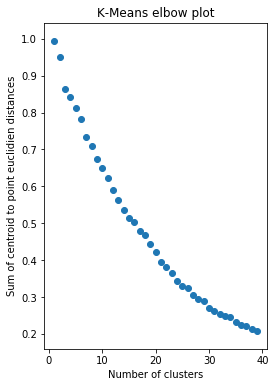

In [154]:
# Choose range for cluster sizes to plot
clusterSizes = list(range(1,40))
avgDistances = []

for k in clusterSizes:
    # make and fit a model with k clusters
    # -------------------
    mdlKMeans.n_clusters = k 
    mdlKMeans.fit(dfBusiness)

    
    # -------------------
    
    # Get distances for each point that is fit to the model
    distsForK = mdlKMeans.transform(dfBusiness)
    
    # Get y values (sum of euclidien distance) for the plot
    # -------------------
    point2ClusterDistance = np.min(distsForK,axis = 1)
    avgDistances.extend([(point2ClusterDistance).mean()])
 
    # -------------------

plt.figure(figsize=(4,6))
plt.scatter(clusterSizes,avgDistances)
plt.ylabel('Sum of centroid to point euclidien distances')
plt.xlabel('Number of clusters')
plt.title('K-Means elbow plot')
#plt.scatter(clusterSizes[17] , avgDistances[17], color = 'red')
#plt.savefig('img/elbowPlot.png')
plt.show()

## Part 3: Predicting Rating Using Clusters

In [29]:
df_final.head()


,Review_ID,u_id,business_id,rev_stars,date,name,city,state,bus_stars,ResReview_count,...,Sports Bars,Wine & Spirits,Argentine,Bakeries,Cafes,Cocktail Bars,Shopping,Venues & Event Spaces,Food,newbus_id
0,0,0LUt7xSvYgLpL0zBezI5QA,nvbfWYxTNq5XgJkcAPcXNQ,5.0,2015-10-24 14:04:14,Thai One On,North York,ON,2.5,38,...,0,0,0,0,0,0,0,0,0,0
1,1,0LUt7xSvYgLpL0zBezI5QA,snw9iNNLpFYZeHotW00uVA,5.0,2015-10-24 12:29:24,Lee Restaurant,Toronto,ON,4.0,561,...,0,0,0,0,0,0,0,0,0,1
2,2,31nz8urmYS2uogLPWZnx7Q,41o1FUbCYKJv2djtnlkzlg,4.0,2016-10-28 00:40:36,Bar Raval,Toronto,ON,4.0,225,...,0,0,0,0,0,0,0,0,0,2
3,3,47NAV-86kgFEuIWT3Y9o-A,EK38MXW_OsC5CZVvIZodIw,4.0,2016-08-22 01:15:05,Fugo Desserts,Toronto,ON,3.5,232,...,0,0,0,0,0,0,0,0,0,3
4,4,6J0mGxAaPuHAPj8ShjOCag,OIdOJaNS8M624F58XGV3PQ,3.0,2016-04-23 01:18:12,Pizzeria Libretto Danforth,Toronto,ON,4.0,287,...,0,0,0,0,0,0,0,0,0,4


In [139]:
ratedBusinessIds = list(df_final.newbus_id) 
ratedBusiness_feature = ['rev_stars','u_id','business_id']

#dfRatedBusiness = dfRatedBusiness.drop_duplicates(subset='business_id', keep='first', inplace=False)
dfRatedBusiness = df_final[ratedBusiness_feature]
dfRatedBusiness.index = ratedBusinessIds


In [140]:
dfRatedBusiness

,rev_stars,u_id,business_id
0,5.0,0LUt7xSvYgLpL0zBezI5QA,nvbfWYxTNq5XgJkcAPcXNQ
1,5.0,0LUt7xSvYgLpL0zBezI5QA,snw9iNNLpFYZeHotW00uVA
2,4.0,31nz8urmYS2uogLPWZnx7Q,41o1FUbCYKJv2djtnlkzlg
3,4.0,47NAV-86kgFEuIWT3Y9o-A,EK38MXW_OsC5CZVvIZodIw
4,3.0,6J0mGxAaPuHAPj8ShjOCag,OIdOJaNS8M624F58XGV3PQ
5,5.0,6J0mGxAaPuHAPj8ShjOCag,K6MBwTYeuLH0VsTVCLVgxg
6,1.0,6J0mGxAaPuHAPj8ShjOCag,ySG8ryvIOkwNF2hKG6pYkw
7,5.0,6J0mGxAaPuHAPj8ShjOCag,Bww6zo7r7rf_N6YRB3hZRQ
8,1.0,6J0mGxAaPuHAPj8ShjOCag,uMQV2qwiviaCA61tvEjmFQ
9,5.0,9aCT1x8udt67wEIqv_xjTA,nBo99rJ9dG6-hiKdo7E7gw


In [141]:
dfRatedBusiness = dfRatedBusiness.loc[dfRatedBusiness['u_id'] == 'zWWcik1fRPZviBCQLC26FQ']

In [142]:
dfRatedBusiness

,rev_stars,u_id,business_id
176,4.0,zWWcik1fRPZviBCQLC26FQ,88RkIuXwJeDzfzSu9xsyzw
79,5.0,zWWcik1fRPZviBCQLC26FQ,OuetgAKs90ce74ojny3nMw
177,3.0,zWWcik1fRPZviBCQLC26FQ,v95ot_TNwTk1iJ5n56dR0g
77,4.0,zWWcik1fRPZviBCQLC26FQ,8I5U8OQ06nSxX2y4PPOWzQ
178,4.0,zWWcik1fRPZviBCQLC26FQ,qCPyN84ieevYZV9ZbUZXgg
179,1.0,zWWcik1fRPZviBCQLC26FQ,pp7Oy267KiVZkgrp-f6OMQ
159,2.0,zWWcik1fRPZviBCQLC26FQ,04HfzvvANCF3hd-yx6ZACw
180,4.0,zWWcik1fRPZviBCQLC26FQ,uwT7CppiYkek-Z-661sndQ
181,4.0,zWWcik1fRPZviBCQLC26FQ,SxjNgkzAlUG-wt2rSbc2HQ
182,4.0,zWWcik1fRPZviBCQLC26FQ,mOzOYgXYOmkdNfZr453PgQ


In [144]:

dfRatedBusiness = dfRatedBusiness.drop_duplicates(subset='business_id', keep='first', inplace=False)

dfRatedBusiness.columns = dfRatedBusiness.columns.str.replace('rev_stars','rating')
ratedBusiness_feature_2  = ['rating']
dfRatedBusiness = dfRatedBusiness[ratedBusiness_feature_2]


KeyError: Index(['business_id'], dtype='object')

In [146]:
dfRatedBusiness.shape

(60, 1)

### 3.1 Model Evaluation

In [147]:
def model_eval(dfWithYs):
    # This function elvaluates the Rsq of the full model (i.e., model predictions
    # for each cluster put together)    
    # Calculate mdl error as difference
    mdlError = dfWithYs.rating - dfWithYs.ratingPred;
    yHatAvg = dfWithYs.rating.mean()
    
    # Calculate R^2 value
    Rsq = 1 - sum(mdlError**2)/sum((dfWithYs.rating - yHatAvg)**2)
    Rsq = np.round(Rsq,3)
    
    # Print results to console
    print('The R^2 over the data is {}'.format(Rsq))

In [148]:
# Define a cluster model
mdlHClus = AgglomerativeClustering(n_clusters=10, linkage='complete', affinity = 'euclidean')
mdlClus = KMeans(n_init = 100, n_clusters=10)
# Define a regression model 
from sklearn.linear_model import LinearRegression
mdlLinReg = LinearRegression()


In [153]:
dfRatedBusiness.shape

(60, 1)

In [150]:
def cluster_regression_model(dfRatedBusiness,dfBusiness,mdlClus,mdlReg,Q=0):
    # Randomly generate training and testing set
   
    
    np.random.seed(1)
    trainMask = np.random.rand(len(dfRatedBusiness)) < 0.8
    dfTrain = dfRatedBusiness[trainMask]
    dfTest = dfRatedBusiness[~trainMask]

    # Fit cluster model to training data (1 line)
    # -------------------
   
    mdlClus.fit(dfBusiness.loc[dfTrain.index])

    # -------------------
    
 # Assign cluster lables to training and testing
    dfTrain = dfTrain.assign(cluster = mdlClus.labels_)
    dfTest = dfTest.assign(cluster = mdlClus.fit_predict(dfBusiness.loc[dfTest.index]))

    # Initialize prediction vector as a new column in dfTrain and dfTest
    dfTrain = dfTrain.assign(ratingPred = np.nan)
    dfTest = dfTest.assign(ratingPred = np.nan)

    # Number of clusters 
    clusters = range(mdlClus.n_clusters)
    # Go through each cluster to make a model
    for c in clusters:
        # Get all indices that belong to cluster c
        trainClusterInds = dfTrain.index[dfTrain.cluster==c]
        testClusterInds = dfTest.index[dfTest.cluster==c]

        # Get associated training and testing data
        yTrain = dfTrain.rating.loc[trainClusterInds]
        xTrain = dfBusiness.loc[trainClusterInds]
        yTest = dfTest.rating.loc[testClusterInds]
        xTest = dfBusiness.loc[testClusterInds]
        
        # Fit regression model to training data (1 line)
        # -------------------

        mdlReg.fit(xTrain, yTrain)
        
        # -------------------

        # Save model predictions to appropriate dfs
        dfTrain.at[trainClusterInds,'ratingPred'] = list(mdlReg.predict(xTrain))
        dfTest.at[testClusterInds,'ratingPred'] = list(mdlReg.predict(xTest))

        # Modify this block to answer question 14
        if Q == 14:
        # -------------------
          
            mdlTrainingPoints = len(yTrain)
            RSquared = np.round(mdlReg.score(xTest,yTest),3)
        # -------------------
            print('Cluster {} trained on {} points and the testing set had an R^2 of {}'.format(c,mdlTrainingPoints,RSquared))


    print('\nTraining set')
    model_eval(dfTrain)
    print('\nTesting set')
    model_eval(dfTest)

# Test function with a lasso model and clusters made in previous step
cluster_regression_model(dfRatedBusiness,dfBusiness,mdlHClus,mdlLinReg)

  


Training set
The R^2 over the data is 0.376

Testing set
The R^2 over the data is -0.353


In [151]:
# Refer to the print statement in the cluster_model (above)
cluster_regression_model(dfRatedBusiness,dfBusiness,mdlHClus,mdlLinReg,Q=14)
#A: R^2 varies a lot, and some clusters have very few points, which mean

Cluster 0 trained on 21 points and the testing set had an R^2 of 0.0
Cluster 1 trained on 13 points and the testing set had an R^2 of 0.0
Cluster 2 trained on 5 points and the testing set had an R^2 of 0.0
Cluster 3 trained on 2 points and the testing set had an R^2 of 0.0
Cluster 4 trained on 3 points and the testing set had an R^2 of 0.0
Cluster 5 trained on 1 points and the testing set had an R^2 of 0.0
Cluster 6 trained on 1 points and the testing set had an R^2 of 0.0
Cluster 7 trained on 1 points and the testing set had an R^2 of 0.0
Cluster 8 trained on 1 points and the testing set had an R^2 of 0.0
Cluster 9 trained on 2 points and the testing set had an R^2 of 0.0

Training set
The R^2 over the data is 0.376

Testing set
The R^2 over the data is -0.353


#### Compare hierarchical clustering model with k-means 

In [152]:
# Define the cluster model
mdlH5Clus= AgglomerativeClustering(n_clusters=5, linkage='complete', affinity = 'euclidean')
mdlKMeans5Clus = KMeans(n_init = 100, n_clusters=5)

# Define a regression model 
cluster_regression_model(dfRatedBusiness,dfBusiness,mdlH5Clus,mdlLinReg)
cluster_regression_model(dfRatedBusiness,dfBusiness,mdlKMeans5Clus,mdlLinReg)



Training set
The R^2 over the data is 0.376

Testing set
The R^2 over the data is -0.238

Training set
The R^2 over the data is 0.376

Testing set
The R^2 over the data is -0.323
